# Challenge Machine Learning Approfondi : Prédiction des survivants du Titanic

## Introduction

Bienvenue dans ce challenge approfondi de machine learning ! Vous allez travailler sur l'un des problèmes les plus emblématiques du domaine : la prédiction des survivants du Titanic. Ce projet vous guidera à travers toutes les étapes essentielles d'un projet de machine learning, de l'exploration détaillée des données à la création, l'amélioration et l'interprétation d'un modèle de régression logistique.

## Contexte historique

Le RMS Titanic était un paquebot britannique qui a fait naufrage dans l'océan Atlantique Nord en avril 1912 après avoir heurté un iceberg lors de son voyage inaugural de Southampton à New York. Sur les 2224 passagers et membres d'équipage, plus de 1500 ont perdu la vie, faisant de cette tragédie l'un des naufrages les plus mortels de l'histoire maritime en temps de paix.

Ce désastre a conduit à d'importantes améliorations dans les réglementations de sécurité maritime et est devenu un sujet d'étude fascinant pour les data scientists, qui cherchent à comprendre quels facteurs ont influencé les chances de survie des passagers.

## Objectif du projet

Votre mission est de développer un modèle de machine learning capable de prédire si un passager a survécu ou non au naufrage du Titanic, en vous basant sur diverses caractéristiques telles que l'âge, le sexe, la classe de billet, etc. Ce faisant, vous découvrirez des insights précieux sur les facteurs qui ont influencé la survie lors de cette tragédie historique.

## Partie 1 : Préparation et exploration approfondie des données

### 1.1 Chargement et préparation initiale des données

**Objectif** : Charger le dataset et effectuer une première inspection des données.

**Instructions** :

1. Importez les bibliothèques nécessaires : pandas, numpy, matplotlib, seaborn.
2. Chargez les données du Titanic depuis le lien fourni avec pandas.
3. Convertissez la colonne 'Survived' en catégories plus lisibles : "Survécu" pour 1, "Décédé" pour 0.
4. Affichez les 10 premières lignes du DataFrame avec `head()`.
5. Utilisez la méthode `info()` pour obtenir un aperçu global du DataFrame, y compris les types de données et les valeurs non-nulles.

**Questions de réflexion** :
- Combien y a-t-il de passagers dans ce dataset ?

887

- Quels types de données (numériques, catégorielles) pouvez-vous identifier ?

données numériques : Pclass ; Age ; Sibling/Spouses ; Parents/childrens ; Fare

données catégorielles : Survived ; Name ; Sex

- Y a-t-il des colonnes avec des valeurs manquantes ? Si oui, lesquelles ?

NON aucune




In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
link = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/titanic.csv"
df_titanic = pd.read_csv(link)
df_titanic['Survived'] = df_titanic['Survived'].apply(lambda x: "Survived" if x == 1 else "Dead")
df_titanic.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,Dead,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,Survived,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,Survived,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,Survived,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,Dead,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [2]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    object 
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(3), object(3)
memory usage: 55.6+ KB


### 1.2 Analyse statistique descriptive

**Objectif** : Obtenir des statistiques descriptives pour mieux comprendre la distribution des données.

**Instructions** :

1. Utilisez la méthode `describe()` pour obtenir des statistiques descriptives des colonnes numériques.
2. Pour les colonnes catégorielles, utilisez `value_counts()` pour voir la distribution des catégories.
3. Calculez le pourcentage global de survie.

**Questions de réflexion** :
- Quelle est la moyenne d'âge des passagers ? Et la médiane ?

Moyenne : 29,47 ans / médiane : 14,12

- Quelle est la répartition des passagers entre les différentes classes ?

La majorité voyagaient en 3emme classe.

- Y a-t-il une grande différence entre la moyenne et la médiane pour certaines variables ? Si oui, que cela pourrait-il indiquer ?

Oui pour le prix : Certaines personne ont acheté leur billet très cher

Oui pour Siblings/Spouses et Parents/Children : La majorité des passagers voyageaient seuls, mais il y avait tout de même de  grandes familles qui augmentent la moyenne

In [3]:
df_titanic.describe()

,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.00000
mean,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.836662,14.121908,1.104669,0.807466,49.78204
min,1.000000,0.420000,0.000000,0.000000,0.00000
25%,2.000000,20.250000,0.000000,0.000000,7.92500
50%,3.000000,28.000000,0.000000,0.000000,14.45420
75%,3.000000,38.000000,1.000000,0.000000,31.13750
max,3.000000,80.000000,8.000000,6.000000,512.32920


### 1.3 Visualisation approfondie des données

**Objectif** : Créer des visualisations pour mieux comprendre les relations entre les variables et leur impact sur la survie.

**Instructions** :

1. Créez un histogramme de la distribution des âges, avec une distinction entre survivants et non-survivants.
2. Réalisez un graphique en barres montrant le taux de survie par classe de passager.
3. Faites un graphique en violon pour comparer la distribution des tarifs (Fare) entre les survivants et les non-survivants.
4. Créez une heatmap de corrélation pour toutes les variables numériques.
5. Réalisez un graphique en barres empilées pour montrer la survie en fonction du sexe et de la classe.

**Questions de réflexion** :
- Y a-t-il une différence notable dans la distribution des âges entre les survivants et les non-survivants ?

OUI, avant 10 ans les enfants ont plus eu tendances à survivre, alors qu'entre 20 et 30 ans les jeunes adultes ont plus eu tendances à ne pas survivre. On observe la même chose pour les personnes agées, elles ont plus eu tendance à ne pas survivre qu'a survivre.

- Quelle classe de passagers semble avoir eu le meilleur taux de survie ? Le pire ?

Il semble que c'est la classe 1

- Pouvez-vous identifier une corrélation entre le prix du billet et les chances de survie ?

OUI, plus les billets étaient chers plus il y avait une chance de survivre

- Quelles variables semblent être les plus corrélées avec la survie ?

Le sexe, l'age et la classe



<ipython-input-4-067ef5ba45ae>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survived["Age_group"] = (survived["Age"] // 10) * 10
<ipython-input-4-067ef5ba45ae>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dead["Age_group"] = (dead["Age"] // 10) * 10


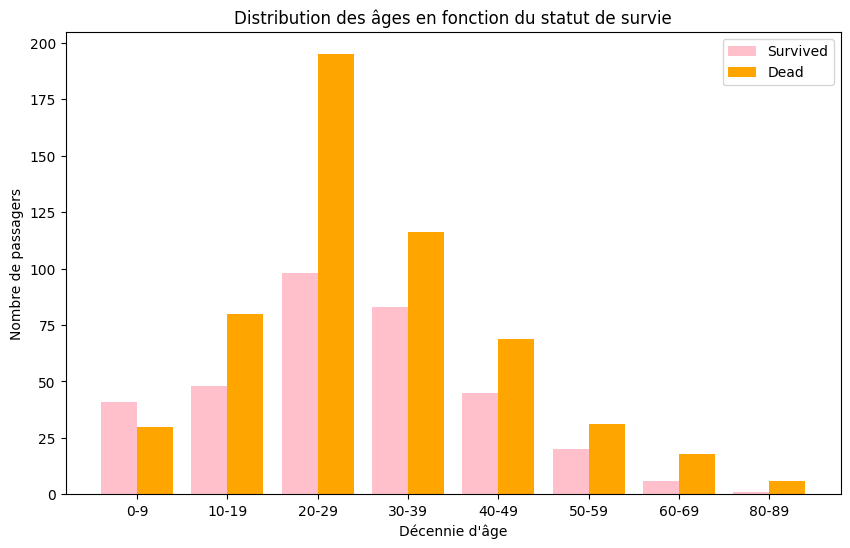

In [4]:
# histogramme de la distribution des âges, avec une distinction entre survivants et non-survivants.
import matplotlib.pyplot as plt
import pandas as pd


# Séparer les données en fonction du statut de survie
survived = df_titanic[df_titanic["Survived"] == "Survived"]
dead = df_titanic[df_titanic["Survived"] == "Dead"]

# Grouper les âges par décennie
survived["Age_group"] = (survived["Age"] // 10) * 10
dead["Age_group"] = (dead["Age"] // 10) * 10

# Calculer la fréquence des âges dans chaque groupe pour les deux catégories
age_groups_survived = survived["Age_group"].value_counts().sort_index()
age_groups_dead = dead["Age_group"].value_counts().sort_index()

# Tracer l'histogramme avec des barres côte à côte pour chaque décennie
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.4
index = np.arange(len(age_groups_survived))
ax.bar(index - bar_width / 2, age_groups_survived, bar_width, label="Survived", color='pink')
ax.bar(index + bar_width / 2, age_groups_dead, bar_width, label="Dead", color='orange')

# Ajouter les labels, la légende et les titres
ax.set_xlabel('Décennie d\'âge')
ax.set_ylabel('Nombre de passagers')
ax.set_title('Distribution des âges en fonction du statut de survie')
ax.set_xticks(index)
ax.set_xticklabels([f"{int(i)}-{int(i + 9)}" for i in age_groups_survived.index])
ax.legend()

# Afficher le graphique
plt.show()


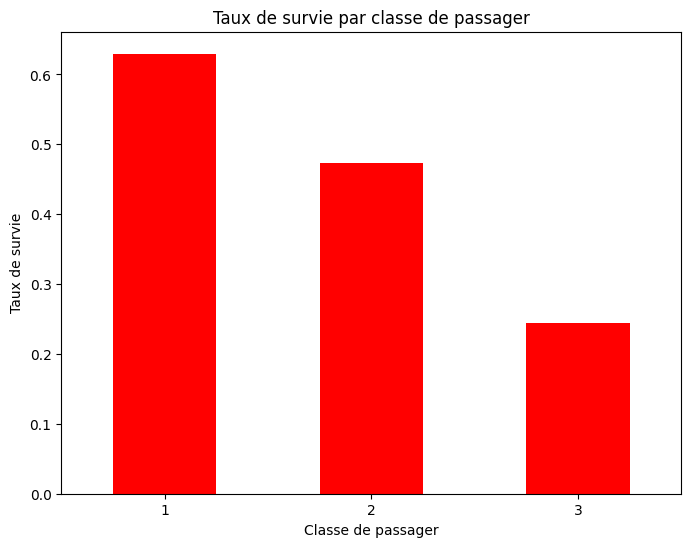

In [5]:
# graphique en barres montrant le taux de survie par classe de passager.

survival_rate = df_titanic.groupby('Pclass')['Survived'].value_counts(normalize=True).unstack().fillna(0)
survival_rate['Survived_rate'] = survival_rate['Survived'] / (survival_rate['Dead'] + survival_rate['Survived'])

# Tracer le graphique en barres du taux de survie par classe
plt.figure(figsize=(8, 6))
survival_rate['Survived_rate'].plot(kind='bar', color='red')

# Ajouter les labels et le titre
plt.xlabel('Classe de passager')
plt.ylabel('Taux de survie')
plt.title('Taux de survie par classe de passager')
plt.xticks(rotation=0)

# Afficher le graphique
plt.show()

<ipython-input-6-21ac5e32d8d0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Survived', y='Fare', data=df_titanic, palette="Set2")


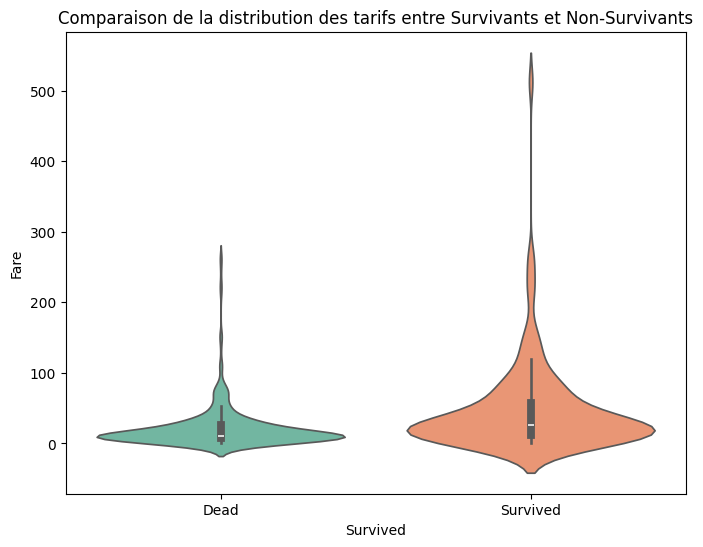

In [6]:
# graphique en violon pour comparer la distribution des tarifs (Fare) entre les survivants et les non-survivants.
plt.figure(figsize=(8, 6))
sns.violinplot(x='Survived', y='Fare', data=df_titanic, palette="Set2")

# Ajouter les labels et le titre
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.title('Comparaison de la distribution des tarifs entre Survivants et Non-Survivants')

# Afficher le graphique
plt.show()

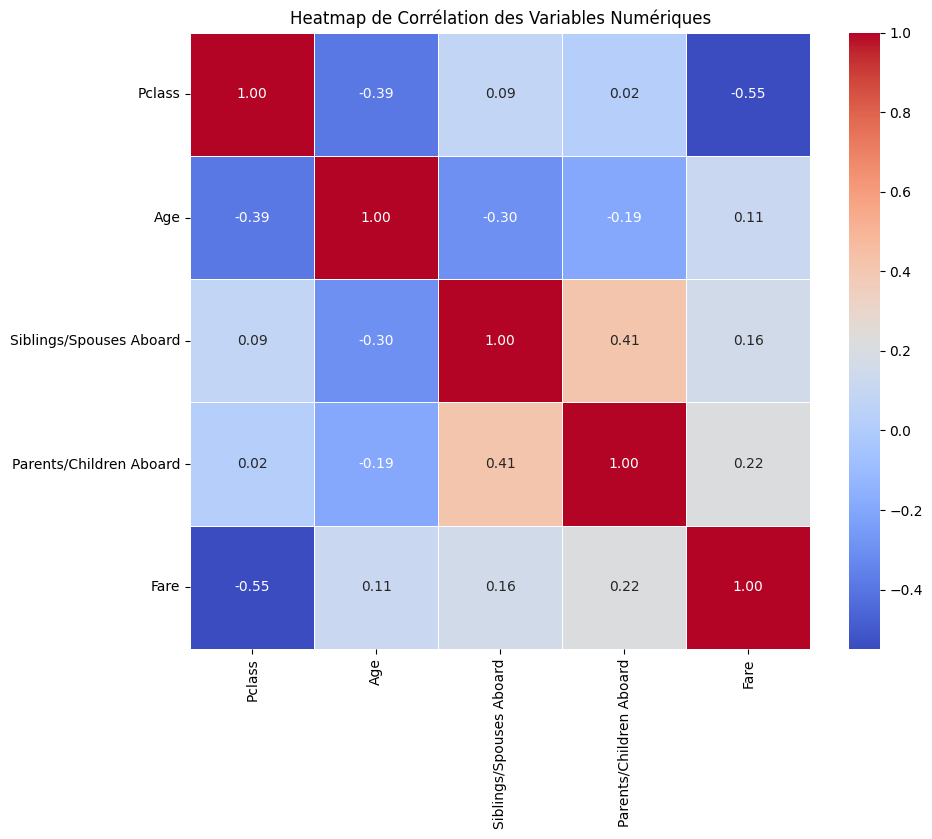

In [7]:
# une heatmap de corrélation pour toutes les variables numériques.
import seaborn as sns

# Sélectionner uniquement les colonnes numériques
df_numeric = df_titanic.select_dtypes(include=[np.number])

# Calcul de la matrice de corrélation pour les colonnes numériques
corr_matrix = df_numeric.corr()

# Création de la heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Ajouter un titre
plt.title('Heatmap de Corrélation des Variables Numériques')

# Affichage du graphique
plt.show()



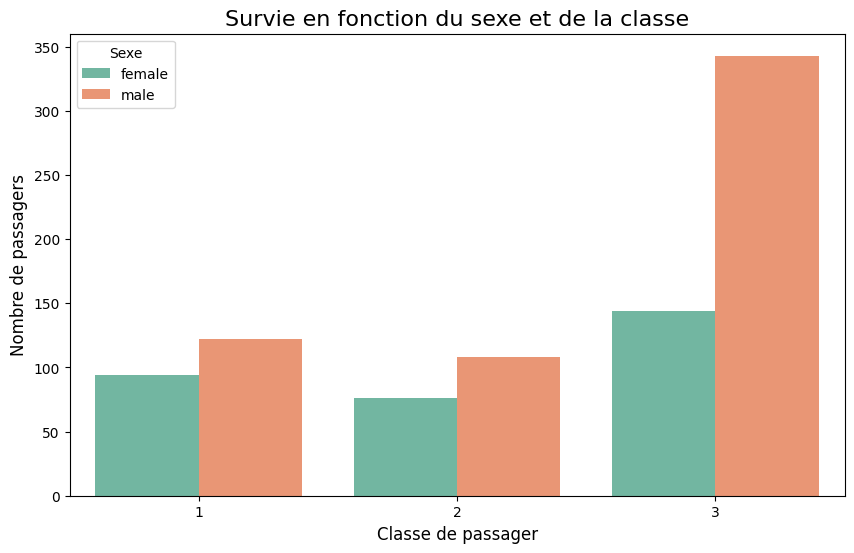

In [8]:
# graphique en barres empilées pour montrer la survie en fonction du sexe et de la classe.

# Création du graphique en barres empilées
plt.figure(figsize=(10, 6))

# Utilisation de countplot pour visualiser la survie en fonction du sexe et de la classe
sns.countplot(data=df_titanic, x='Pclass', hue='Sex', palette='Set2', hue_order=['female', 'male'])

# Ajout des titres et des labels
plt.title('Survie en fonction du sexe et de la classe', fontsize=16)
plt.xlabel('Classe de passager', fontsize=12)
plt.ylabel('Nombre de passagers', fontsize=12)

# Afficher la légende pour le sexe
plt.legend(title='Sexe', loc='upper left')

# Affichage du graphique
plt.show()


### 1.4 Analyse des valeurs manquantes

**Objectif** : Identifier et traiter les valeurs manquantes dans le dataset.

**Instructions** :

1. Utilisez la méthode `isnull().sum()` pour compter les valeurs manquantes dans chaque colonne.
2. Créez un graphique montrant le pourcentage de valeurs manquantes pour chaque colonne.
3. Pour la colonne 'Age', analysez si les valeurs manquantes sont distribuées aléatoirement ou s'il y a un biais.
4. Proposez et implémentez une stratégie pour gérer ces valeurs manquantes (par exemple, imputation par la moyenne, la médiane, ou une méthode plus avancée).

**Questions de réflexion** :
- Quelles colonnes ont le plus de valeurs manquantes ?
- Pourquoi certaines colonnes pourraient-elles avoir plus de valeurs manquantes que d'autres ?
- Quelle stratégie d'imputation vous semble la plus appropriée pour chaque colonne avec des valeurs manquantes ? Pourquoi ?


JE NE COMPRENDS PAS, DANS MON JEU DE DONNÉES IL N'Y A PAS DE DONNÉES MANQUANTES



In [9]:
# Utilisez la méthode isnull().sum() pour compter les valeurs manquantes dans chaque colonne.
missing_values = df_titanic.isnull().sum()
missing_values


,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
Siblings/Spouses Aboard,0
Parents/Children Aboard,0
Fare,0


## Partie 2 : Préparation du modèle de régression logistique

### 2.1 Sélection et préparation des features

**Objectif** : Préparer les données pour l'entraînement du modèle.

**Instructions** :

1. Sélectionnez les features pertinentes pour votre modèle, en incluant celles que vous avez créées.
2. Utilisez `pd.get_dummies()` pour encoder les variables catégorielles.
3. Divisez les données en features (X) et target (y).
4. Normalisez les features numériques en utilisant `StandardScaler` de sklearn.

**Questions de réflexion** :
- Pourquoi est-il important d'encoder les variables catégorielles ?

Le modèle sait lire seulement des données numériques

- Quels sont les avantages de la normalisation des features numériques ?

La normalisation des données permet d'éviter qu'une variable ai plus d'influence qu'une autre. Par exemple ici far est beaucoup plus éparpillé que age

- Y a-t-il des features que vous avez décidé de ne pas inclure ? Pourquoi ?

Oui certaines comme le nom par exemple car il n'y a pas d'interet


In [10]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Sélectionnez les features pertinentes pour votre modèle, en incluant celles que vous avez créées.
features = ["Pclass", "Sex", "Age", "Siblings/Spouses Aboard", "Parents/Children Aboard", "Fare", "Survived"]

# Utilisez pd.get_dummies() pour encoder les variables catégorielles.
df_titanic = pd.get_dummies(df_titanic, columns=["Sex"], drop_first=True)

# Divisez les données en features (X) et target (y).
X = df_titanic.drop(columns=["Survived", "Name"])
y = df_titanic["Survived"]

### 2.2 Division des données

**Objectif** : Diviser les données en ensembles d'entraînement et de test.

**Instructions** :

1. Importez `train_test_split` de sklearn.
2. Divisez vos données en ensembles d'entraînement et de test (80% train, 20% test).
3. Utilisez `random_state=36` pour la reproductibilité.
4. Vérifiez que la proportion de survivants est similaire dans les deux ensembles.

**Questions de réflexion** :
- Pourquoi est-il important de diviser les données en ensembles d'entraînement et de test ?

Il est important de diviser le jeu de données pour diffèrentes raison : pouvoir évaluer notre travail sur des données que le modèle n'a pas encore vu ; éviter le surraprentissage

- Que se passerait-il si la proportion de survivants était très différente entre les deux ensembles ?

Il pourrait y avoir un important biais dans l'entrainement du modèle ainsi que dans l'évaluation

In [11]:
# importez train_test_split de sklearn.
from sklearn.model_selection import train_test_split

In [12]:
# Divisez vos données en ensembles d'entraînement et de test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=36, stratify=y)

In [13]:
# Vérifiez que la proportion de survivants est similaire dans les deux ensembles.

# Mappage des valeurs "Survived" et "Dead" en valeurs numériques (1 et 0)
y_train = y_train.map({"Survived": 1, "Dead": 0})
y_test = y_test.map({"Survived": 1, "Dead": 0})

# Maintenant tu peux calculer la moyenne sans erreur
train_survival_rate = y_train.mean()
test_survival_rate = y_test.mean()

print(f"Proportion de survivants dans l'ensemble d'entraînement : {train_survival_rate:.2%}")
print(f"Proportion de survivants dans l'ensemble de test : {test_survival_rate:.2%}")


Proportion de survivants dans l'ensemble d'entraînement : 38.50%
Proportion de survivants dans l'ensemble de test : 38.76%


### 2.3 Entraînement du modèle initial

**Objectif** : Entraîner un premier modèle de régression logistique et évaluer ses performances.

**Instructions** :

1. Importez `LogisticRegression` de sklearn.
2. Instanciez un modèle de régression logistique avec `random_state=36`.
3. Entraînez le modèle sur les données d'entraînement.
4. Faites des prédictions sur les ensembles d'entraînement et de test.
5. Calculez et affichez la précision (accuracy) sur les deux ensembles.
6. Affichez la matrice de confusion et le rapport de classification pour l'ensemble de test.
7. Affichez les coefficients du modèle et interprétez-les.

**Questions de réflexion** :
- Comment interprétez-vous la différence de précision entre l'ensemble d'entraînement et l'ensemble de test ?
- Quelles features semblent avoir le plus d'impact sur la prédiction selon les coefficients du modèle ?
- Y a-t-il des signes de surapprentissage (overfitting) ou de sous-apprentissage (underfitting) ?



In [14]:
# Importer LogisticRegression de sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [15]:
# Instanciez un modèle de régression logistique avec random_state=36.
model = LogisticRegression(random_state=36)

In [16]:
# Entraînez le modèle sur les données d'entraînement.
model.fit(X_train, y_train)

LogisticRegression(random_state=36)

In [17]:
# Faites des prédictions sur les ensembles d'entraînement et de test.
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [18]:
# Calculez et affichez la précision (accuracy) sur les deux ensembles.
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Précision sur l'ensemble d'entraînement : {train_accuracy:.2f}")
print(f"Précision sur l'ensemble de test : {test_accuracy:.2f}")

Précision sur l'ensemble d'entraînement : 0.80
Précision sur l'ensemble de test : 0.81


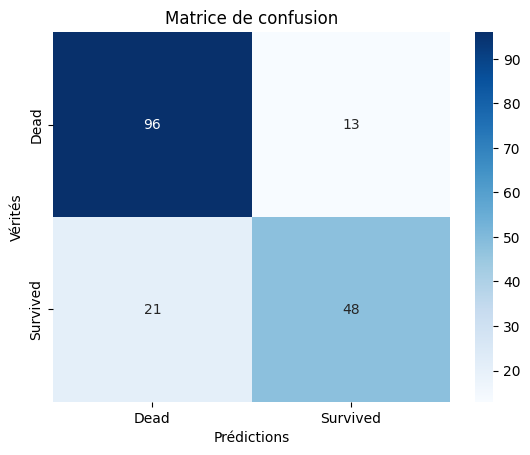

In [19]:
# Affichez la matrice de confusion et le rapport de classification pour l'ensemble de test.
conf_matrix = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Dead", "Survived"], yticklabels=["Dead", "Survived"])
plt.title("Matrice de confusion")
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.show()

In [20]:
# Affichez les coefficients du modèle et interprétez-les.
print("Rapport de classification sur l'ensemble de test :")
print(classification_report(y_test, y_test_pred))

Rapport de classification sur l'ensemble de test :
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       109
           1       0.79      0.70      0.74        69

    accuracy                           0.81       178
   macro avg       0.80      0.79      0.79       178
weighted avg       0.81      0.81      0.81       178



## Partie 3 : Amélioration et interprétation du modèle

### 3.1 Ajustement des hyperparamètres

**Objectif** : Optimiser les hyperparamètres du modèle pour améliorer ses performances.

**Instructions** :

1. Importez `GridSearchCV` de sklearn.
2. Définissez une grille de recherche pour les hyperparamètres C et penalty.
3. Utilisez la validation croisée (avec GridSearchCV) pour trouver les meilleurs hyperparamètres.
4. Réentraînez le modèle avec les meilleurs hyperparamètres.
5. Comparez les performances de ce nouveau modèle avec le modèle initial.

**Questions de réflexion** :
- Quels hyperparamètres ont donné les meilleures performances ? Pourquoi pensez-vous que c'est le cas ?
- Comment la validation croisée aide-t-elle à prévenir le surapprentissage ?



In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Définition de la grille des hyperparamètres à tester
param_grid = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100],  # Valeurs typiques pour la régularisation
    "penalty": ["l1", "l2"]  # Type de régularisation
}

# Création du modèle de base
logreg = LogisticRegression(solver="liblinear", random_state=36)  # liblinear permet L1 et L2

# Initialisation de GridSearchCV avec validation croisée (5-folds)
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring="accuracy", n_jobs=-1, verbose=1)

# Exécution de la recherche sur les données d'entraînement
grid_search.fit(X_train, y_train)

# Affichage des meilleurs hyperparamètres
print(f"Meilleurs hyperparamètres : {grid_search.best_params_}")

# Réentraînement du modèle avec les meilleurs hyperparamètres
best_logreg = grid_search.best_estimator_
best_logreg.fit(X_train, y_train)

# Évaluation du modèle optimisé
y_train_pred_opt = best_logreg.predict(X_train)
y_test_pred_opt = best_logreg.predict(X_test)

train_accuracy_opt = accuracy_score(y_train, y_train_pred_opt)
test_accuracy_opt = accuracy_score(y_test, y_test_pred_opt)

print(f"Précision du modèle optimisé (train) : {train_accuracy_opt:.2f}")
print(f"Précision du modèle optimisé (test) : {test_accuracy_opt:.2f}")

# Comparaison avec le modèle initial
print("\nComparaison avec le modèle initial :")
print(f"Précision modèle initial (train) : {train_accuracy:.2f} → Modèle optimisé : {train_accuracy_opt:.2f}")
print(f"Précision modèle initial (test) : {test_accuracy:.2f} → Modèle optimisé : {test_accuracy_opt:.2f}")

# Affichage du rapport de classification
print("\nRapport de classification du modèle optimisé :")
print(classification_report(y_test, y_test_pred_opt))


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Meilleurs hyperparamètres : {'C': 100, 'penalty': 'l1'}
Précision du modèle optimisé (train) : 0.80
Précision du modèle optimisé (test) : 0.80

Comparaison avec le modèle initial :
Précision modèle initial (train) : 0.80 → Modèle optimisé : 0.80
Précision modèle initial (test) : 0.81 → Modèle optimisé : 0.80

Rapport de classification du modèle optimisé :
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       109
           1       0.77      0.70      0.73        69

    accuracy                           0.80       178
   macro avg       0.80      0.78      0.79       178
weighted avg       0.80      0.80      0.80       178



### 3.2 Analyse des erreurs

**Objectif** : Comprendre les cas où le modèle se trompe.

**Instructions** :

1. Identifiez les instances mal classées par le modèle dans l'ensemble de test.
2. Analysez les caractéristiques de ces instances mal classées.
3. Créez des visualisations pour comparer les prédictions correctes et incorrectes.

**Questions de réflexion** :
- Y a-t-il des patterns communs parmi les instances mal classées ?
- Quelles améliorations pourriez-vous suggérer pour réduire ces erreurs ?



Instances mal classées :
     Pclass   Age  Siblings/Spouses Aboard  Parents/Children Aboard     Fare  \
531       3  30.0                        0                        0   8.6625   
198       2  24.0                        0                        0  13.0000   
736       1  45.0                        0                        0  30.0000   
265       3  25.0                        1                        0   7.7750   
21        2  34.0                        0                        0  13.0000   

     Sex_male  True Label  Predicted Label  
531     False           0                1  
198     False           0                1  
736      True           1                0  
265      True           1                0  
21       True           1                0  

Statistiques des instances mal classées :
          Pclass        Age  Siblings/Spouses Aboard  Parents/Children Aboard  \
count  35.000000  35.000000                35.000000                35.000000   
mean    2.457143  2

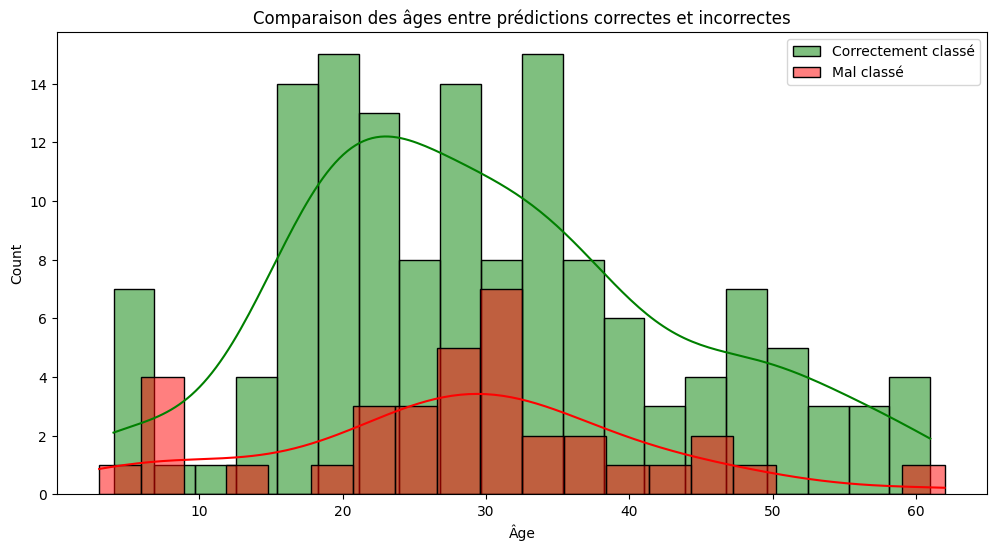

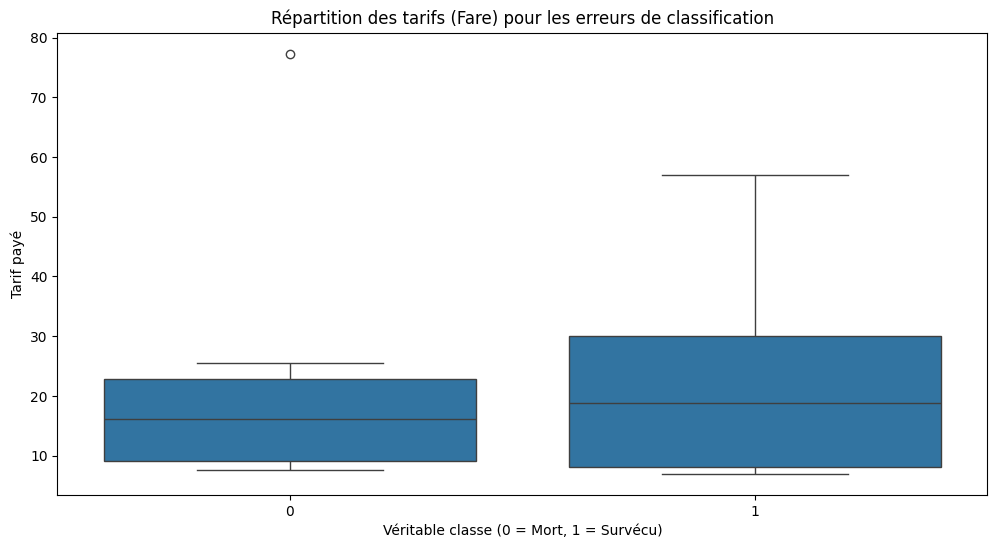

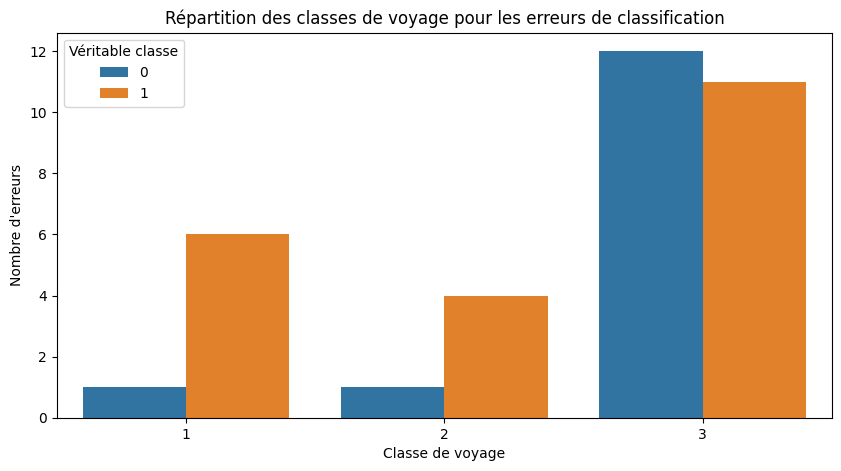

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convertir y_test en pandas Series (au cas où c'est un array numpy)
y_test_series = pd.Series(y_test, index=X_test.index)
y_test_pred_series = pd.Series(y_test_pred_opt, index=X_test.index)

# Identifier les indices des erreurs de classification
misclassified_indices = (y_test_series != y_test_pred_series)

# Récupérer les instances mal classées
misclassified_samples = X_test.loc[misclassified_indices].copy()
misclassified_samples["True Label"] = y_test_series[misclassified_indices]
misclassified_samples["Predicted Label"] = y_test_pred_series[misclassified_indices]

# Affichage des instances mal classées
print("Instances mal classées :")
print(misclassified_samples.head())

# Analyse statistique des erreurs
print("\nStatistiques des instances mal classées :")
print(misclassified_samples.describe())

# Visualisation des erreurs sur l'âge
plt.figure(figsize=(12, 6))
sns.histplot(X_test.loc[~misclassified_indices, "Age"], color="green", label="Correctement classé", kde=True, bins=20)
sns.histplot(X_test.loc[misclassified_indices, "Age"], color="red", label="Mal classé", kde=True, bins=20)
plt.title("Comparaison des âges entre prédictions correctes et incorrectes")
plt.xlabel("Âge")
plt.legend()
plt.show()

# Comparaison des tarifs payés (Fare)
plt.figure(figsize=(12, 6))
sns.boxplot(data=misclassified_samples, x="True Label", y="Fare")
plt.title("Répartition des tarifs (Fare) pour les erreurs de classification")
plt.xlabel("Véritable classe (0 = Mort, 1 = Survécu)")
plt.ylabel("Tarif payé")
plt.show()

# Comparaison des classes de voyage (Pclass)
plt.figure(figsize=(10, 5))
sns.countplot(data=misclassified_samples, x="Pclass", hue="True Label")
plt.title("Répartition des classes de voyage pour les erreurs de classification")
plt.xlabel("Classe de voyage")
plt.ylabel("Nombre d'erreurs")
plt.legend(title="Véritable classe")
plt.show()


### 3.3 Comparaison avec d'autres modèles

**Objectif** : Comparer les performances de la régression logistique avec d'autres algorithmes.

**Instructions** :

1. Implémentez au moins deux autres modèles (par exemple, Random Forest et SVM).
2. Comparez les performances de ces modèles avec votre modèle de régression logistique optimisé.
3. Discutez des avantages et des inconvénients de chaque approche.

**Questions de réflexion** :
- Quel modèle a donné les meilleures performances ? Pourquoi pensez-vous que c'est le cas ?
- Quels sont les compromis entre la performance et l'interprétabilité pour chaque modèle ?
- Dans un scénario réel, quel modèle recommanderiez-vous d'utiliser et pourquoi ?



In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialisation des modèles
rf_model = RandomForestClassifier(n_estimators=100, random_state=36)
svm_model = SVC(kernel="linear", random_state=36)

# Entraînement des modèles
rf_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred_rf = rf_model.predict(X_test)
y_pred_svm = svm_model.predict(X_test)

# Calcul des précisions
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_lr = accuracy_score(y_test, y_test_pred_opt)  # Précision du modèle logistique optimisé

# Affichage des résultats
print(f"Précision de la Régression Logistique Optimisée : {accuracy_lr:.2%}")
print(f"Précision de Random Forest : {accuracy_rf:.2%}")
print(f"Précision de SVM : {accuracy_svm:.2%}")

# Matrices de confusion
print("\nMatrice de confusion - Random Forest :")
print(confusion_matrix(y_test, y_pred_rf))

print("\nMatrice de confusion - SVM :")
print(confusion_matrix(y_test, y_pred_svm))

# Rapports de classification
print("\nRapport de classification - Random Forest :")
print(classification_report(y_test, y_pred_rf))

print("\nRapport de classification - SVM :")
print(classification_report(y_test, y_pred_svm))


Précision de la Régression Logistique Optimisée : 80.34%
Précision de Random Forest : 82.02%
Précision de SVM : 78.65%

Matrice de confusion - Random Forest :
[[95 14]
 [18 51]]

Matrice de confusion - SVM :
[[93 16]
 [22 47]]

Rapport de classification - Random Forest :
              precision    recall  f1-score   support

           0       0.84      0.87      0.86       109
           1       0.78      0.74      0.76        69

    accuracy                           0.82       178
   macro avg       0.81      0.81      0.81       178
weighted avg       0.82      0.82      0.82       178


Rapport de classification - SVM :
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       109
           1       0.75      0.68      0.71        69

    accuracy                           0.79       178
   macro avg       0.78      0.77      0.77       178
weighted avg       0.78      0.79      0.78       178



## Conclusion et réflexions finales

1. Résumez les principales découvertes de votre analyse.

La classe sociale (Pclass) est un facteur clé : les passagers de 1ʳᵉ classe avaient un taux de survie bien plus élevé que ceux de 3ᵉ classe.
Le sexe joue un rôle majeur : les femmes avaient beaucoup plus de chances de survivre que les hommes.
L'âge influence la survie : les enfants avaient un avantage, notamment en raison de la politique "les femmes et les enfants d'abord".
Le prix du billet (Fare) : un tarif plus élevé était souvent associé à une meilleure chance de survie, corrélé avec la classe sociale.

2. Quels facteurs semblent avoir le plus influencé la survie sur le Titanic ?

Être une femme → Beaucoup plus de chances de survie.
Voyager en 1ʳᵉ classe → Taux de survie nettement plus élevé.
Être jeune → Les enfants avaient une meilleure chance d'être évacués.
Les passagers de 3ᵉ classe, en particulier les hommes adultes, avaient les plus faibles taux de survie.

3. Quelles sont les limites de votre analyse et comment pourriez-vous l'améliorer ?

Facteurs non pris en compte : Nous n’avons pas analysé l’emplacement des cabines, le nombre de membres d’équipage, ou l’accès aux canots de sauvetage.
Méthodes plus avancées : Des modèles plus complexes (ex. deep learning) pourraient mieux capturer les interactions entre les variables.

4. Si vous deviez conseiller quelqu'un pour augmenter ses chances de survie sur le Titanic, que lui diriez-vous basé sur votre analyse ?

Voyagez en 1ʳᵉ classe si possible (meilleures chances de monter dans un canot). Si vous êtes un homme, accompagnez une femme ou un enfant pour maximiser vos chances d’accès aux canots.

5. Comment les techniques que vous avez apprises dans ce projet pourraient-elles être appliquées à d'autres problèmes de la vie réelle ?

Médecine : Prédire la probabilité de survie d’un patient en fonction de ses caractéristiques (âge, antécédents médicaux, traitements).

